# Part I - Ford GoBike System Data 
# by OLUGBENGA FEYISAYO CHARLES

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, in Februaury, 2019. 


## Preliminary Wrangling


In [66]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [67]:
df = pd.read_csv('201902-fordgobike-tripdata.csv', sep = ',')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [68]:
df.shape

(183412, 16)

In [69]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [70]:
# checking for any anomalies in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [71]:
# Checking for any duplicated values in the dataset
df.duplicated().sum()

0

> Some columns are irrelevant for the analysis, hence it is pertinent to drop them

In [72]:
# drop irrelevant columns: start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude 

idx = np.r_[3, 5:8, 9:11]
df.drop(df.columns[idx], axis = 1, inplace= True)

In [73]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [74]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> From the above, we clearly see that 'start_station_name', 'end_station_name', 'member_birth_year', and 'member_gender' have some null values, this values can not be replaced so we get to drop them.

In [75]:
df[['start_station_name', 'end_station_name', 'member_birth_year', 'member_gender']].isna().sum()

start_station_name     197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64

In [76]:
# Dropping the null values in this columns

df.dropna(subset= ['start_station_name', 'end_station_name', 'member_birth_year', 'member_gender'], how = 'any', inplace = True)

In [77]:
# confirming if our drop worked.

df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> Changing some colums types.

In [78]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_name          object
end_station_name            object
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [79]:
# Changing the data types for start_time and end_time, and member_birth_year

cols = df.columns[1:3]
df[cols] = df[cols].apply(pd.to_datetime, format="%Y-%m-%d %H:%M:%S", errors ='coerce')

df.member_birth_year = df['member_birth_year'].astype(int)

In [80]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

> Getting the month, date, and year column separately

In [81]:
from datetime import datetime as dt

df['day'] = df['start_time'].dt.day
df['month'] = df['start_time'].dt.month
df['year'] = df['start_time'].dt.year

In [82]:
df.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,month,year
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,28,2,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,28,2,2019


In [83]:
# The year column is irrelevant since it is just a single unique value, so its dropped 

df.drop(['year'], axis = 1, inplace = True)

In [84]:
# Naming the months the right way 

df['month'] = df['month'].map({1:'Jan', 2: 'Feb', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [85]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,28,Feb
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,28,Feb
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,28,Feb
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,28,Feb
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,28,Feb


In [86]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'day', 'month'],
      dtype='object')

>Dropping 'start_time', 'end_time', and 'bike_share_for_all_trip' because they're not needed any more

In [87]:
df.drop(columns=['start_time', 'end_time', 'bike_share_for_all_trip'], inplace = True)

In [88]:
# Getting a new column for age 
df['member_age'] = df.member_birth_year.apply(lambda x: 2019 - x)

> Converting duration_sec to duration_mins 

In [89]:
# # Converting duration_sec to minutes 
df["duration_min"] = np.ceil(df.duration_sec / 60).astype(int)

# dropping the duration in sec
df.drop(columns='duration_sec', inplace=True)

In [90]:
df.head()

,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,day,month,member_age,duration_min
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,28,Feb,35,870
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,28,Feb,47,1031
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,28,Feb,30,609
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,28,Feb,45,27
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,28,Feb,60,30


In [91]:
df.columns

Index(['start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'day', 'month', 'member_age',
       'duration_min'],
      dtype='object')

In [92]:
df.shape

(174952, 10)

### What is the structure of your dataset?

The dataset contains 174,952 rows and 10 columns. This is what we get after cleaning the original dataset.

### What is/are the main feature(s) of interest in your dataset?
I am interested in the most common user type, When most trips are taken in terms of day of the month, and what's the most used bike to make these trips, the most common start and end stations.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect (user_type, duration_sec, member_gender, member_birth_year, member_age, month, year) to all be of importance in my analysis of the dataset.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. 


In [93]:
def figure_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
#     """This function is to setup shared setting between graphs

#     Args:
#         title (str): Graph title
#         xlabel (str, optional): Text for x label. Defaults to "".
#         ylabel (str, optional): Text for y label. Defaults to "".
#         x_double (bool, optional): A boolean value to make the graph double in size in x axis. Defaults to False.
#         y_double (bool, optional): A boolean value to make the graph double in size in y axis. Defaults to False.
#     """
    plt.figure(figsize=(20 if x_double else 10, 12 if y_double else 6))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

I'll start my analysis with the most common gender type.
 What gender rides bike the most?

In [94]:
gender_count = df['member_gender'].value_counts()

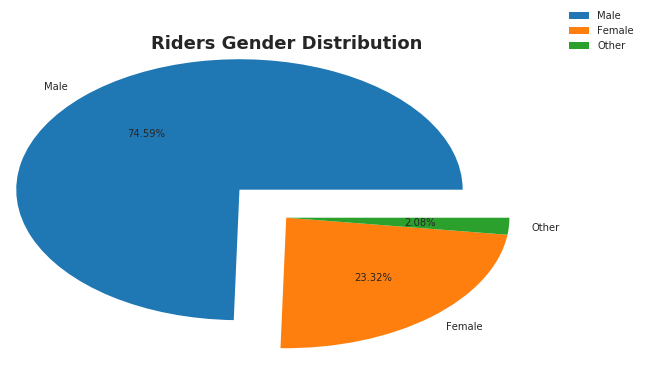

In [95]:
figure_basics("Riders Gender Distribution")
plt.pie(gender_count, autopct='%1.2f%%', labels=gender_count.index, explode = [0.3,0,0])
plt.legend(labels=gender_count.index, loc= [1,1]);


With almost 75%, the male has the most riders in the bike_sharing sysytem.


>## What is the most common user type in the bike sharing system

In [96]:
sb.color_palette()

base_color = sb.color_palette()[0]

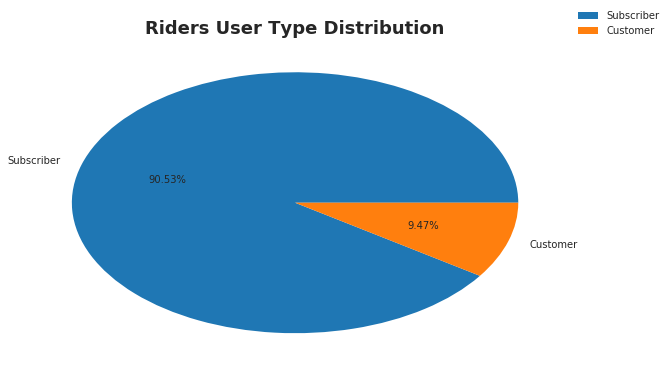

In [97]:
user_type = df['user_type'].value_counts()



# Plotting the graph
figure_basics("Riders User Type Distribution")
plt.pie(user_type, autopct='%1.2f%%', labels=user_type.index)
plt.legend(labels=user_type.index, loc= [1,1]);



The bike-sharing system has more subsribers than customers. This shows more users are committed to doing bike rides, and this has led them to be active subscribers rather than just being a customer.

>## Age Distribution 

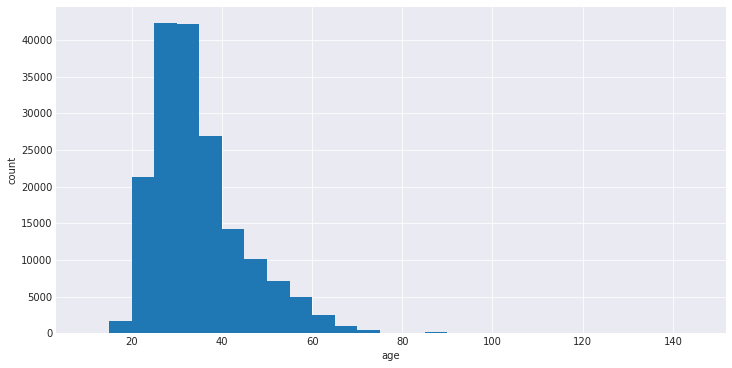

In [98]:
# Checking for the age distribution of riders using the age column

binsize = 5
bins = range(10, df.member_age.max() + 5, 5)

plt.figure(figsize = [12, 6])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('age')
plt.ylabel('count')
plt.show()


Majority of the riders are between the age of 25 and 35. This makes for a young age group of riders, even though there are outliers in the age distribution

In [99]:
min_age = df.member_age.min()
max_age = df.member_age.max()

print(min_age)
print(max_age)

18
141


In [100]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

The minimum age is 18, while the max is 141. Grouping the age in increment of 30s to give an age group will give us a better idea of the age distribution. 

In [101]:
df['age_group'] = pd.cut(df['member_age'],[0, 30, 60, 90, 120, 150], 
                                labels=['very_young', 'young', 'old', 'very_old', 'Extremely_old'])

In [102]:
x= df['age_group'].value_counts()
y= df['age_group'].value_counts().sum()

print(x)
print(y)

young            97155
very_young       74267
old               3453
very_old            76
Extremely_old        1
Name: age_group, dtype: int64
174952


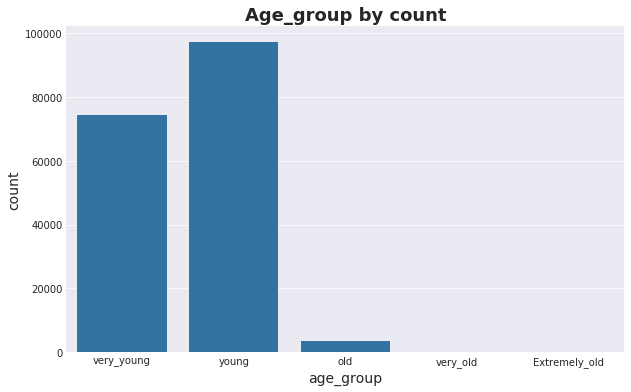

In [103]:
sb.color_palette()
base_color = sb.color_palette()[0]

figure_basics("Age_group by count")
sb.countplot(data= df, x  = 'age_group', color = base_color);

From the above graph, the most riders fall in the age group of 'young' people between the age of 25-50. Riders above the age of 60 are not common.

> ## Getting the most popular, and least popular start and end stations.

In [53]:
# start = df['start_station_name'].nunique() 
# end = df['end_station_name'].nunique()

# print(start)
# print(end)

df['start_station_name'].nunique() == df['end_station_name'].nunique()

True

Since we have same number of start station and end station, then we don't need to modify. We just need to get the most popular and least used start station and end stations

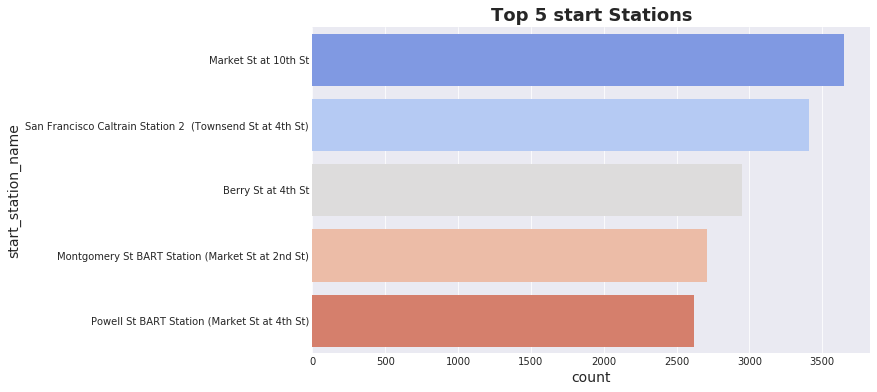

In [105]:
figure_basics('Top 5 start Stations')
sb.countplot(y= df['start_station_name'], data=df, palette='coolwarm',order=df['start_station_name'].value_counts().index[:5]);

The 'Market st at 10th st' is the most popular start station, it is obviously the most prefered start station for bike riders

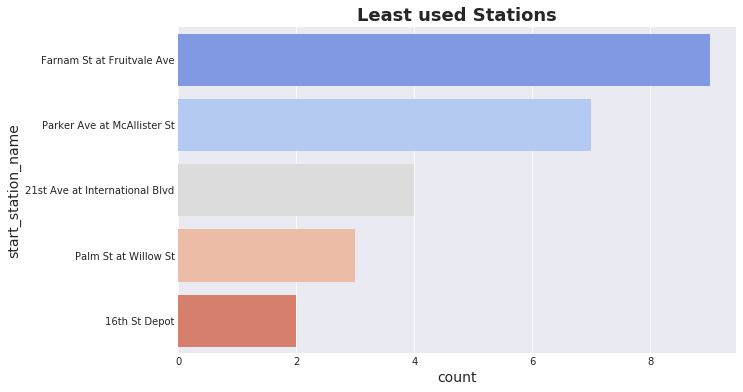

In [107]:
figure_basics('Least used Stations')
sb.countplot(y= df['start_station_name'], data=df, palette='coolwarm',order=df['start_station_name'].value_counts().index[-5:]);


The '16th St Depot' is the least used start station, it was been used just twice

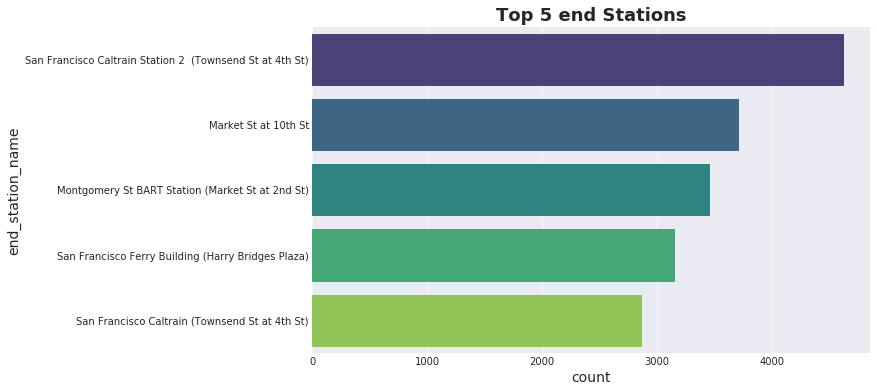

In [108]:
# Getting the most popular end stations and Least used

figure_basics('Top 5 end Stations')
sb.countplot(y= df['end_station_name'], data=df, palette='viridis',order=df['end_station_name'].value_counts().index[:5]);

The most popular end station is the 'San Francisco Caltrain station 2 (Townsend St at 4th St)', interestingly it appears as the second most popular start station, while the most popular start station 'Market st at 10th st', is the second most used end station. This only shows that users prefer to start and end their rides in same station, rather than having a different start and end station, which will most likely increase the ride duration. 

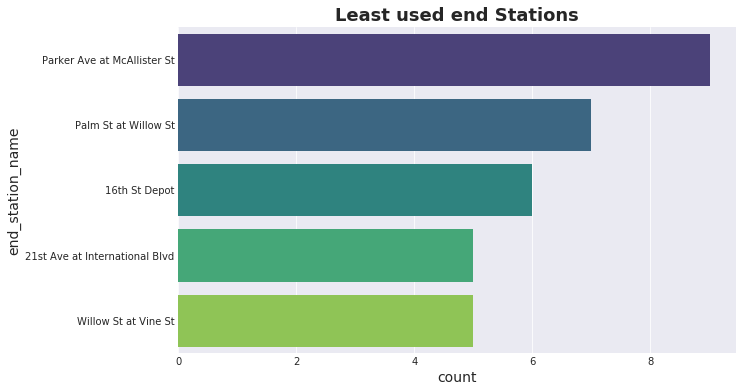

In [109]:
# Getting the least used end station

figure_basics('Least used end Stations')
sb.countplot(y= df['end_station_name'], data=df, palette='viridis',order=df['end_station_name'].value_counts().index[-5:]);

The least used end station is the '21st ave at International blvd', however, Just like the start stations, it is also one of the least used start station, this further justifies my earlier observation that riders prefer to use same station to start and end their rides.

>## Distribution of Trip duration in days

In [218]:
df.day.nunique()

28

In [111]:
day = df['day'].value_counts().index
print(day)

Int64Index([28, 20, 21, 19,  7, 22,  6, 11, 12,  5, 27, 15, 25, 14,  8,  1, 18,
             4, 26, 23, 24, 17, 16, 10, 13,  2,  3,  9],
           dtype='int64')


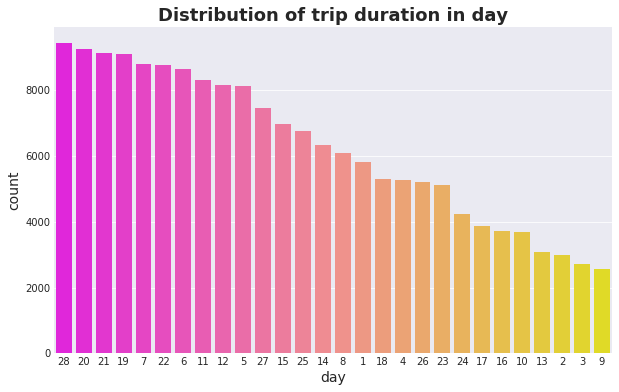

In [112]:
figure_basics('Distribution of trip duration in day')
sb.countplot(data=df, x = 'day', order= day, palette = 'spring');

Riders were most likely to ride on the 28th day of the month than any other days, and they were least expected to ride on the 9th day of the month.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are more subscribers than customers, there were more males doing bike rides compared to other genders. Most users prefer to use the same start staion and end station. Most rides occured on the last day of the month

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were outliers in the age distribution, as there were a number of riders above the 100 year mark which seemed impossible, however grouping the ages showed that most of the riders fell into the young category. 

## Bivariate Exploration



>## What is the average ride duration for each category of users

In [113]:
ride_category = df.groupby(['user_type'], as_index= False)['duration_min'].agg('mean')
ride_category

,user_type,duration_min
0,Customer,22.333816
1,Subscriber,11.167925


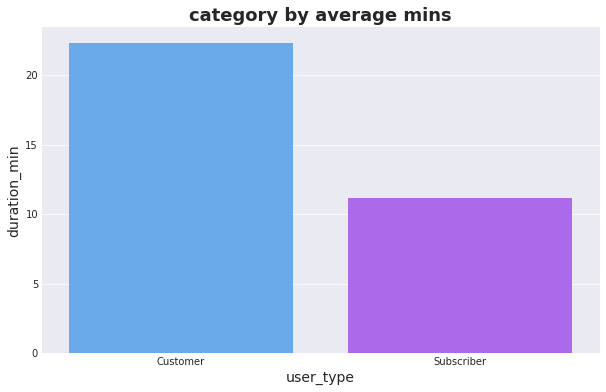

In [118]:
figure_basics('category by average mins')
sb.barplot(data= ride_category, x = 'user_type', y = 'duration_min', ci = None, palette = 'cool');

It is interesting to see that despite the susbscribers are more than the customers, it is the customers that have racked up more average riding minutes, almost double that of the subscribers. 

>## Average trip duration for each gender

In [119]:
avg_gender_ride = df.groupby(['member_gender'], as_index= False)['duration_min'].agg('mean')
avg_gender_ride

,member_gender,duration_min
0,Female,13.472173
1,Male,11.698460
2,Other,17.122018


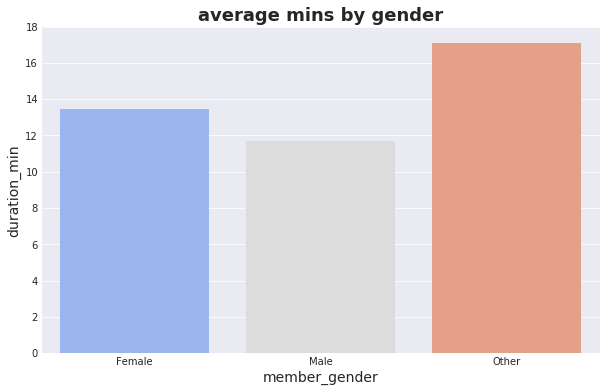

In [120]:
figure_basics('average mins by gender')
sb.barplot(data= avg_gender_ride, x = 'member_gender', y = 'duration_min', ci = None, palette = 'coolwarm');

The 'other' gender had more ride minutes than both the male and the female gender.

>## Getting an average of the bike ride duration in minutes to know what bike was used the most.

In [121]:
# Group by bike id, and get mean for duration
df2 = df.groupby(['bike_id'], as_index= False)['duration_min'].agg('mean')
df2.duration_min.max()

255.5

In [122]:
top_5_bike = df2.sort_values(by= ['duration_min'], ascending= False).head(5)
top_5_bike

,bike_id,duration_min
1844,2853,255.500000
848,1325,255.333333
3795,5781,207.285714
4166,6181,204.200000
3014,4876,204.000000


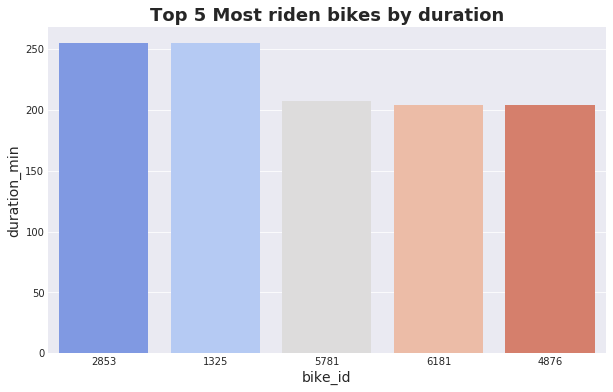

In [123]:
figure_basics('Top 5 Most riden bikes by duration')
sb.barplot(data= top_5_bike, x = 'bike_id', y='duration_min', ci=None, palette = 'coolwarm', order = ([2853, 1325, 5781, 6181, 4876]));

Bike with bike_id 2853 has the most ride minutes on average, that makes it the most riden bike, following closely behind it bike 1325

In [124]:
Least_5_bike = df2.sort_values(by= ['duration_min'], ascending= False).tail(5)
Least_5_bike

,bike_id,duration_min
304,470,3.0
907,1410,2.0
1094,1679,2.0
143,231,2.0
343,523,2.0


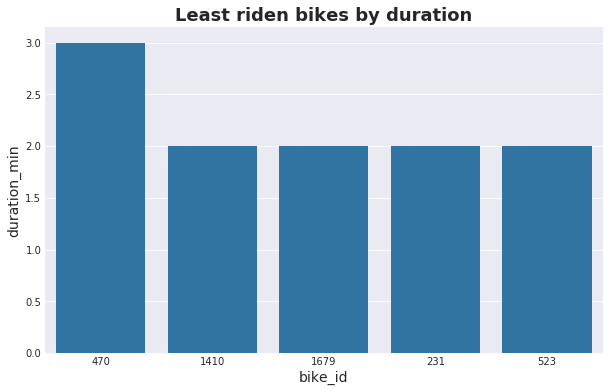

In [126]:
figure_basics('Least riden bikes by duration')
sb.barplot(data= Least_5_bike, x = 'bike_id', y='duration_min', ci=None, color=sb.color_palette()[0], order = ([470,1410,1679,231,523]));

The least riden bikes are bikes with bike ids; 1410, 1679, 231, 523.

In [127]:
df.head()

,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,day,month,member_age,duration_min,age_group
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,28,Feb,35,870,young
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,28,Feb,47,1031,young
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,28,Feb,30,609,very_young
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,28,Feb,45,27,young
5,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,28,Feb,60,30,young


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The customers had more ride duration than subscribers, that is an interesting thing to note. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Another thing to note is that even though the male gender had more riders, they had lesser ride minutes compared to the other gender in the gender category.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Correlation between some numeric variables within the dataset

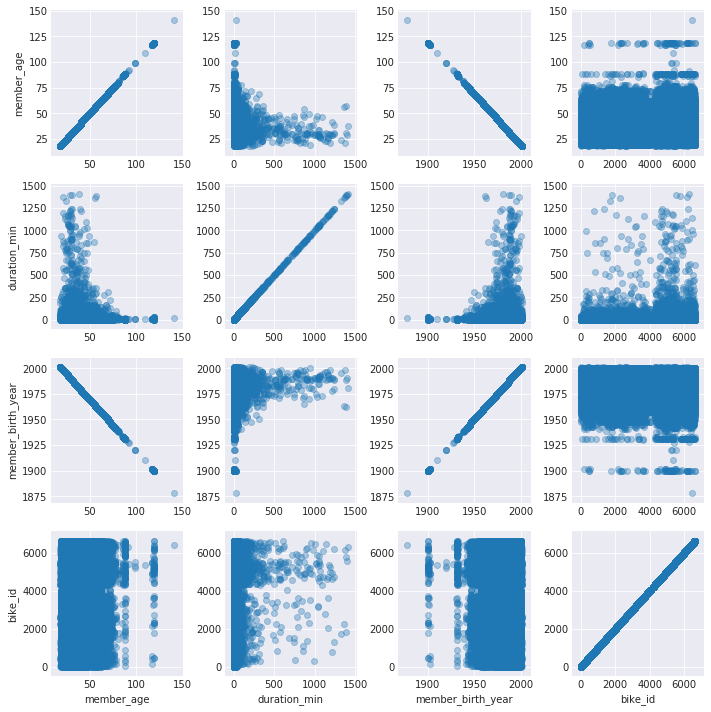

In [128]:
data_stat = ['member_age', 'duration_min', "member_birth_year", "bike_id"]
g = sb.PairGrid(data = df, vars = data_stat);
g.map(plt.scatter, alpha = 1/3);

From the above charts we see Correlation between `specific numeric variables` in the dataset using scatter plots 
- There is no Correlation for any variable with time ( duration_minutes)
- There is a negative  Correlation between member_birth_year and age which normal.
- There is no significant Correlation for any variable with bike_id

Daily distribution of Gender ride duration in mins

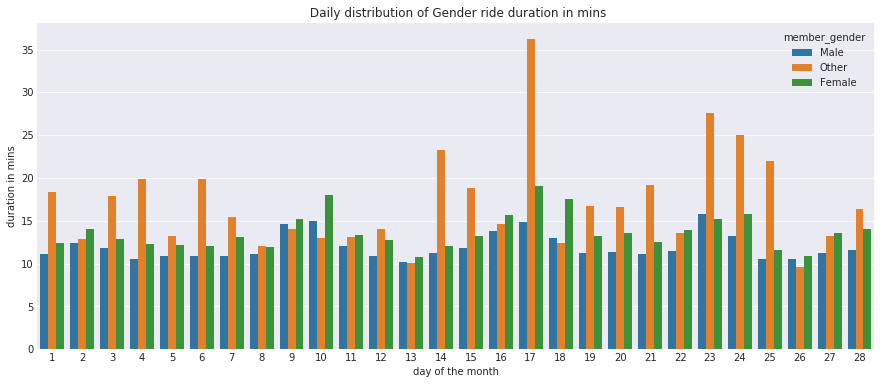

In [129]:
plt.figure(figsize=(15,6))
sb.barplot(data =df, y = 'duration_min', x='day', ci=None, hue='member_gender')
plt.xlabel('day of the month')
plt.ylabel('duration in mins')
plt.title(" Daily distribution of Gender ride duration in mins");


From the above image, it is so obvious that the 'other' gender had most of their ride minutes on the 17th of the month, interestingly the female had their most minutes on same day. However the male folks appear to be the least users of the bikes, obviously they have very little minutes on average compared to the other two genders.

Correlation of all the variables in the dataset

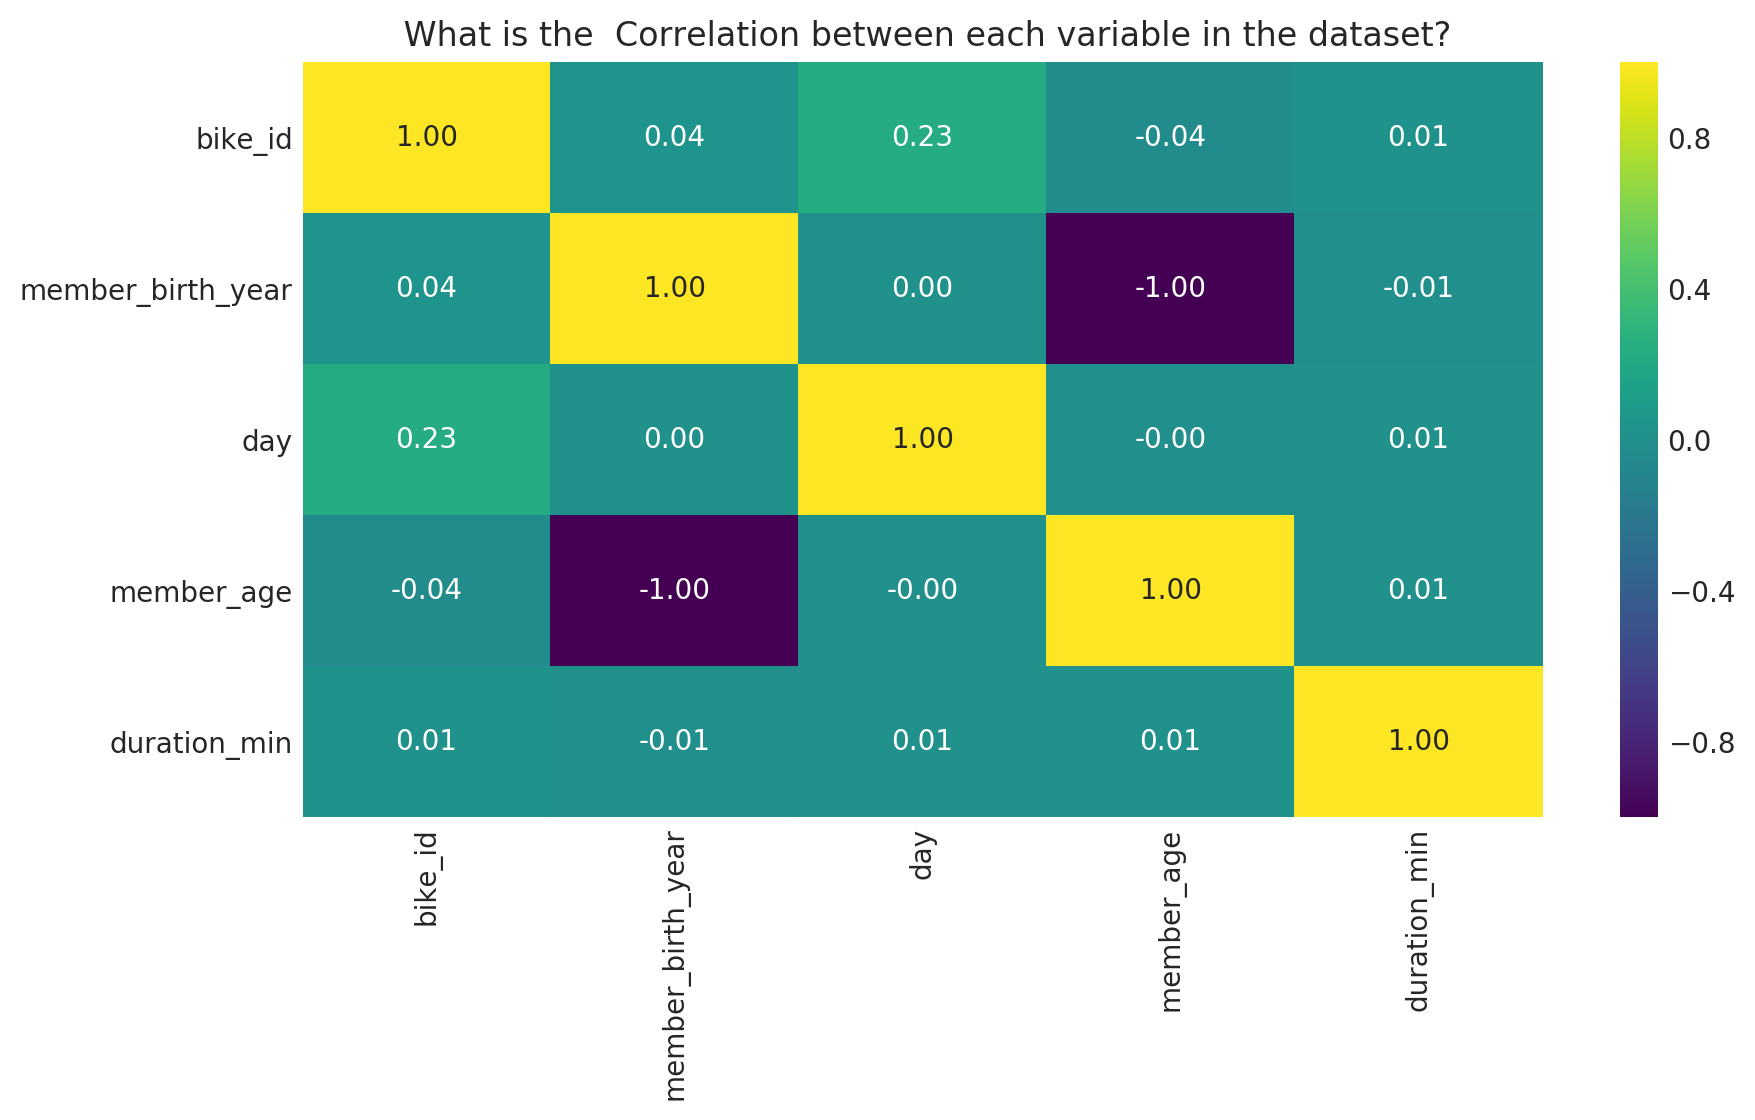

In [130]:
plt.figure(figsize = (10,5), dpi = 200)
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)

plt.title(" What is the  Correlation between each variable in the dataset?")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the above image, we can deduce correlations between the the diffrent variables in the dataframe,
- There is no correlation between any of the variables and bike_id
- There is a negative correlation between birth year and age of members, which is expected 
- There is no correlation between the age of members and the ride duration in minutes.

### Were there any interesting or surprising interactions between features?

Looking back at the plots for all variables, it is easy to conclude that majority of numerical values had liitle or  no interactions between them, except for age and birth year.

- Most users were Male.
 -Most users were subscriber.
- The distribution of duration was strange as the minutes charts shows that customers used the bikes more than 
- The female distribution depending on their Age more than male 

## Conclusions
There is little or no correlation between the age of riders and the minutes of rides accumulated. Majority of the numerical variables in the dataset had no correlation whatsoever, except for the member age, and birth yer which had a negative correlation. The duration in minute is independent of other variables in the datatset
Most of the users of the bikes were male, with almost 75 percent. It is however obvious that majority of the male gender were subscribers, hence the subscribers were the majority of the users as well, compared to only a little of them which were customers.
Riders favored riding bikes towards the end of the month, compared to fewer rides during the beggining of the month.
Most riders loved to start and end their ride journey at the same station. 


In [234]:
# I am saving the cleaned dataset to a new csv file file so it can be easily accessed for use in the explanatory section

df.to_csv('bike_sharing_cleaned.csv', index = False)